# Statistics for Engineers

Tuorial at SRECon 2015

by Heinrich Hartmann (<heinrich.hartmann@circonus.com> / Twitter: [@HeinrichHartman](http://twitter.com/HeinrichHartman))

## Heinrich Hartmann

* Twitter: [@HeinrichHartman](https://twitter.com/HeinrichHartman)
* Blog: [HeinrichHartmann.com](https://heinrichhartmann.com)

### Bio

* Phd in pure Mathematics (Mainz, Bonn, Oxford)

* Postdoc in IT (Koblenz)

* Freelance Consultant

* Data Scientist at Circonus.com

<img src="Circonus_Logo.png" style="margin-right:auto; margin-left:auto">

<img src="me.jpg" width="200px" style="margin-right:auto; margin-left:auto">

# Outline

1. Mathematical Background

2. Hands on Data Handling and Visualization

3. Advanced Techniques


## Analyzing a Histogram

We got two histogram of latencies from `dtrace`. We want to compare those histograms and find structural changes.

In [140]:
!cat dtrace_histogram_a.txt | head
!cat dtrace_histogram_b.txt | head

           value  ------------- Distribution ------------- count    
            4096 |                                         0        
            8192 |@                                        9        
           16384 |@@@@@@@@@@@@@@@@@@@@@                    298      
           32768 |@@                                       28       
           65536 |@                                        12       
          131072 |@@                                       22       
          262144 |@                                        16       
          524288 |@                                        8        
         1048576 |                                         7        
           value  ------------- Distribution ------------- count    
            4096 |                                         0        
            8192 |                                         407      
           16384 |@@@@@@@@@@@@@@@@@@@@@@@@@@               63572    
           32768 |@@@@@@@@@@@     

The first task is to clean the data and convert it to a csv file.
UNIX tools are a good choice here.

In [138]:
# Get rid of the headder row
!cat dtrace_histogram_a.txt | tail -n +2

            4096 |                                         0        
            8192 |@                                        9        
           16384 |@@@@@@@@@@@@@@@@@@@@@                    298      
           32768 |@@                                       28       
           65536 |@                                        12       
          131072 |@@                                       22       
          262144 |@                                        16       
          524288 |@                                        8        
         1048576 |                                         7        
         2097152 |                                         5        
         4194304 |@                                        8        
         8388608 |@                                        11       
        16777216 |@@                                       22       
        33554432 |@                                        21       
        67108864 |                

In [141]:
# Isolate digits using regular expressions
!cat dtrace_histogram_a.txt | tail -n +2 | perl -pe 's/^\D*(\d+)\D*(\d+)\D*$/\1,\2\n/'

4096,0
8192,9
16384,298
32768,28
65536,12
131072,22
262144,16
524288,8
1048576,7
2097152,5
4194304,8
8388608,11
16777216,22
33554432,21
67108864,7
134217728,4
268435456,4
536870912,14
1073741824,36
2147483648,18
4294967296,26
8589934592,0
17179869184,0
34359738368,1
68719476736,0


In [136]:
!cat dtrace_histogram_a.txt | tail -n +2 | perl -pe 's/^\D*(\d+)\D*(\d+)\D*$/\1,\2\n/' > dtrace_histogram_a.txt.csv

In [135]:
!head dtrace_histogram_a.txt.csv

4096,0
8192,9
16384,298
32768,28
65536,12
131072,22
262144,16
524288,8
1048576,7
2097152,5


Now load the data into the tool of your choice!

(Note: This might well be Excel, if you like it.)

In [91]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [120]:
a = np.loadtxt("dtrace_histogram_a.txt.csv", delimiter=",", ndmin=2)
bins,counts = a.T # transpose the data to isolate columns

<Container object of 25 artists>

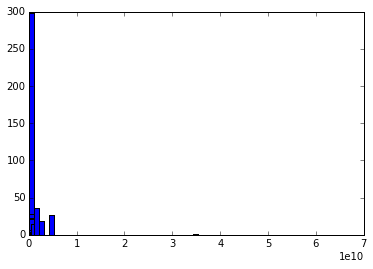

In [128]:
plt.bar(bins, counts, width=10**9)


<Container object of 25 artists>

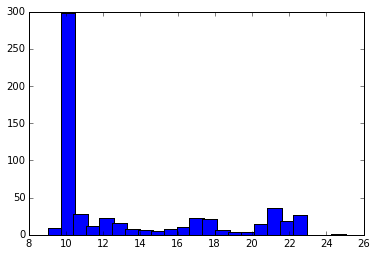

In [122]:
# Take logs on the x-axis
plt.bar([np.log(x) for x in bins], counts)